In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
def show_img_plt(img, fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img,cmap='gray', vmin=vmin, vmax=vmax)

In [3]:
def show_mult_img_plt(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i],cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

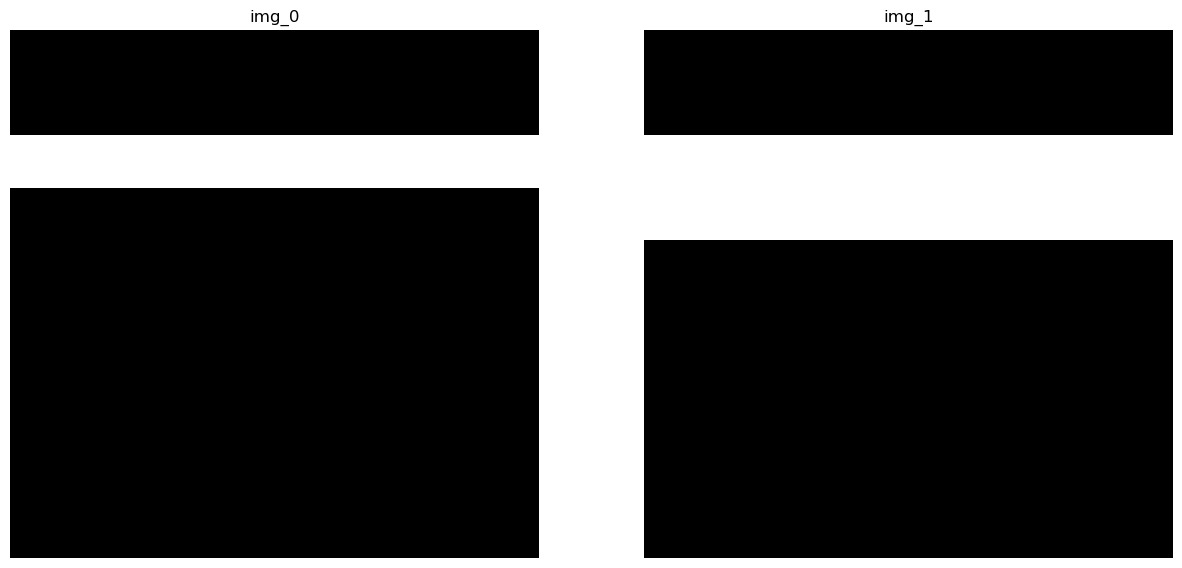

In [4]:
#detecting desired edge using robert. 
binary_img = np.zeros((10, 10), dtype=np.uint8)
binary_img[2, :] = 255

binary_img = np.float32(binary_img)

#robert kernel
robert_kernel_x = np.array([[1, 0], [0, -1]])
robert_kernel_y = np.array([[0, 1], [-1, 0]])

robert_x_edge = cv2.filter2D(binary_img, -1, robert_kernel_x)
robert_y_edge = cv2.filter2D(binary_img, -1, robert_kernel_y)

#show_mult_img_plt(1, 2, (robert_x_edge, robert_y_edge))

robert_edge = np.sqrt(np.square(robert_x_edge) + np.square(robert_y_edge))
show_mult_img_plt(1, 2, (binary_img, robert_edge))

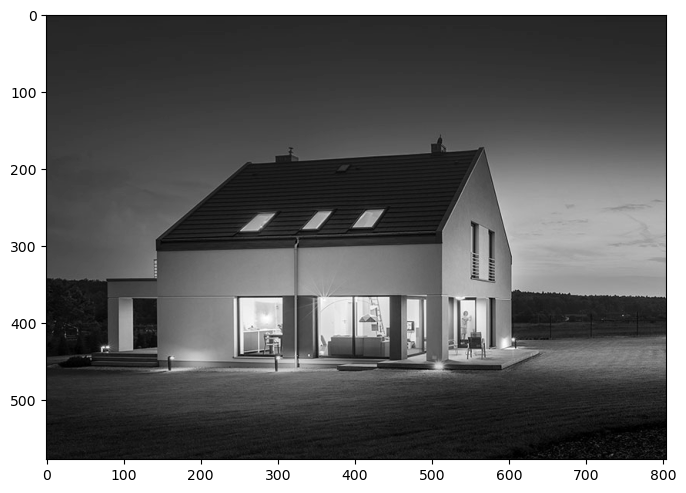

In [5]:
image = cv2.imread('img/0_home.jpg', cv2.IMREAD_GRAYSCALE)
show_img_plt(image)

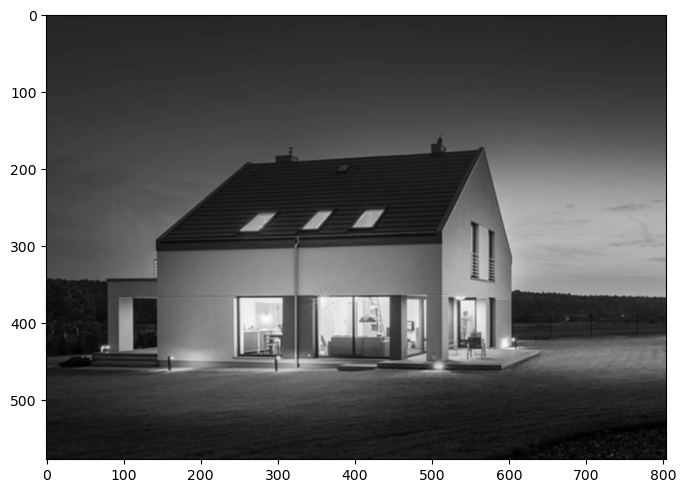

In [6]:
img_gaussian_blur = cv2.GaussianBlur(image, (3, 3), 0)
show_img_plt(img_gaussian_blur)

In [7]:
#robert kernel
robert_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
robert_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

img_gaussian_blur = np.float32(img_gaussian_blur)
robert_x_edge_2 = cv2.filter2D(img_gaussian_blur, -1, robert_kernel_x)
robert_y_edge_2 = cv2.filter2D(img_gaussian_blur, -1, robert_kernel_y)

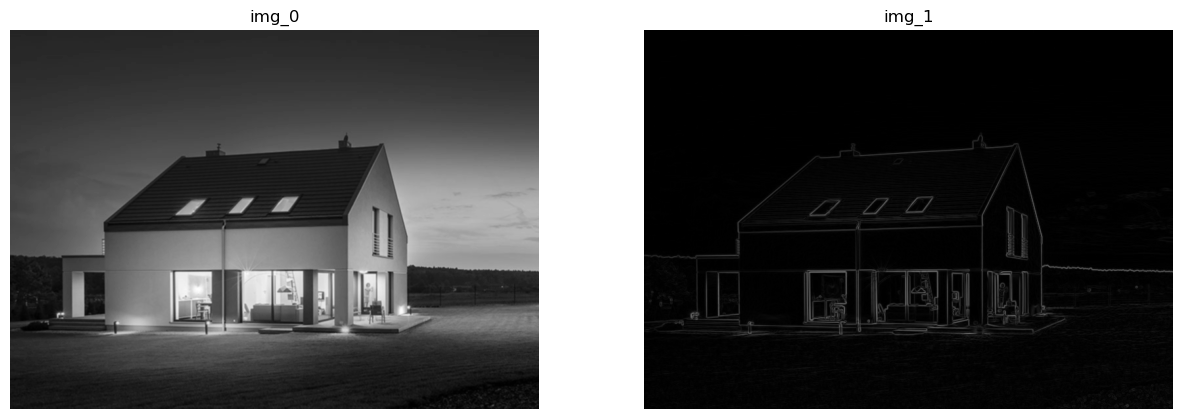

In [8]:
robert_xy_edge = np.sqrt(np.square(robert_x_edge_2) + np.square(robert_y_edge_2))
show_mult_img_plt(1, 2, (img_gaussian_blur, robert_xy_edge))

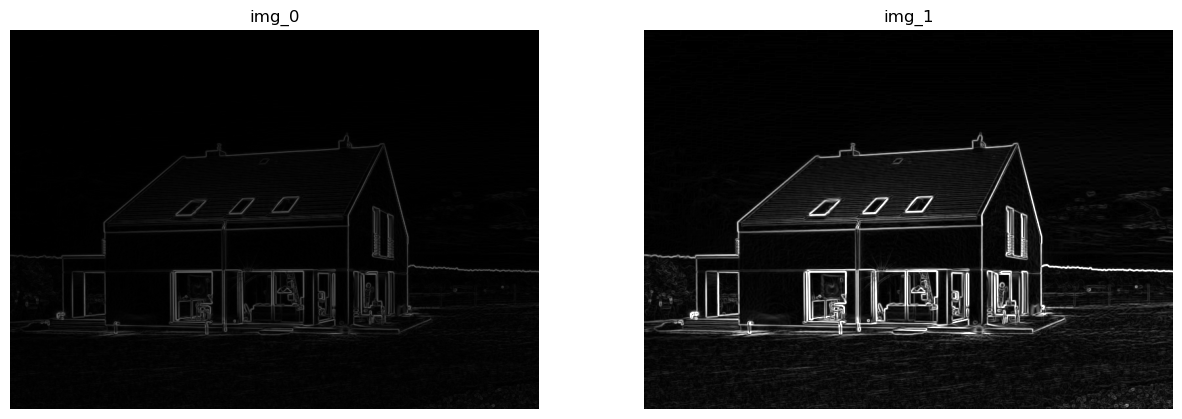

In [9]:
prewitt_x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = np.float32)
prewitt_y_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = np.float32)

prewitt_x_edge = cv2.filter2D(img_gaussian_blur, -1, prewitt_x_kernel)
prewitt_y_edge = cv2.filter2D(img_gaussian_blur, -1, prewitt_y_kernel)

prewitt_xy_edge = np.sqrt(np.square(prewitt_x_edge) + np.square(prewitt_y_edge))

show_mult_img_plt(1, 2, (robert_xy_edge, prewitt_xy_edge))


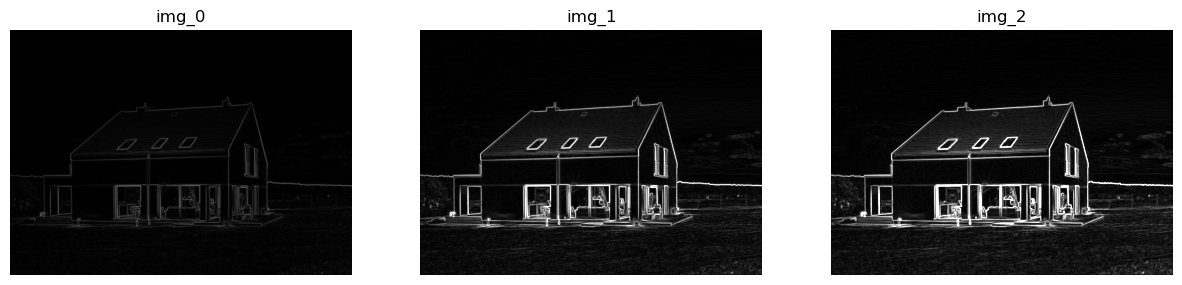

In [10]:
#sobel
sobel_x = cv2.Sobel(img_gaussian_blur, cv2.CV_64F,1,0, ksize = 3)
sobel_y = cv2.Sobel(img_gaussian_blur, cv2.CV_64F,0, 1, ksize = 3)

sobel_xy = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

show_mult_img_plt(1, 3, (robert_xy_edge, prewitt_xy_edge, sobel_xy))


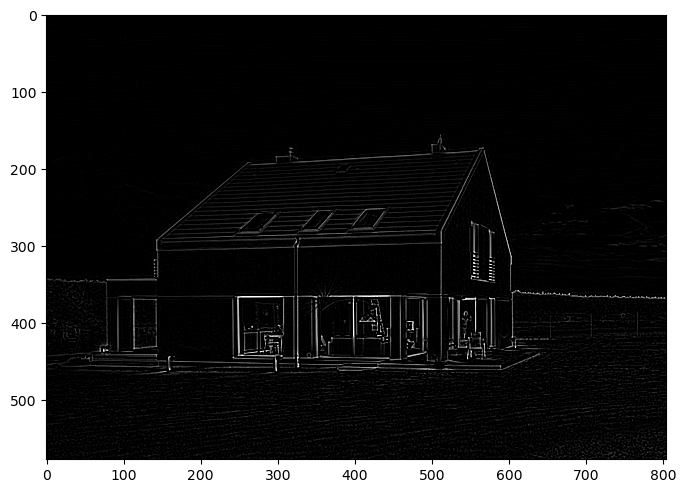

In [11]:
#Laplacian
#    dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size)
laplacian = cv2.Laplacian(img_gaussian_blur, -1, ksize = 3)
show_img_plt(laplacian)

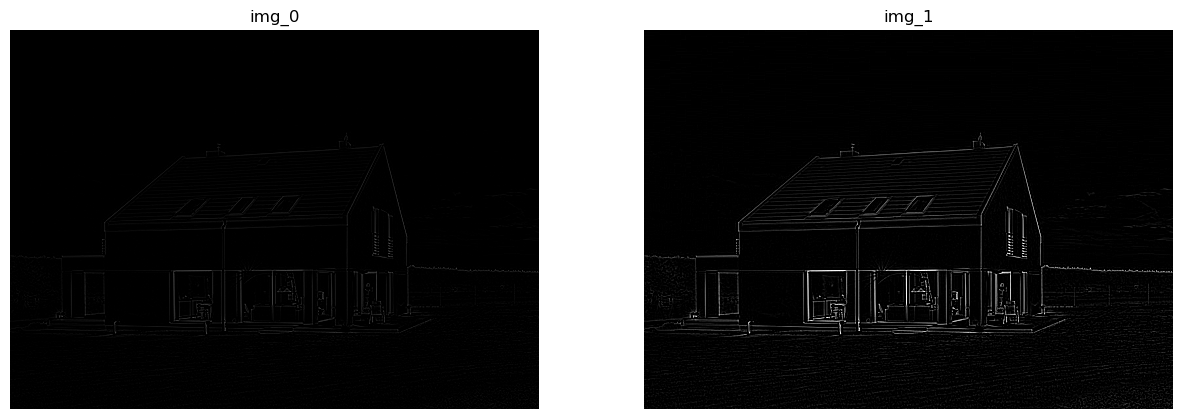

In [12]:
laplacian_kernel =np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype= np.float32)
laplacian_edge = cv2.filter2D(img_gaussian_blur, -1, laplacian_kernel)
show_mult_img_plt(1, 2, (laplacian_edge, laplacian))

In [13]:
laplacian_edge

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  5.,   3.,  -6., ...,   5.,  -2., -16.],
       [  6.,   5.,  -5., ...,  -3.,   4.,   0.],
       [  4.,   3.,  -5., ...,  -1.,   1.,   6.]], dtype=float32)

ret 20.0


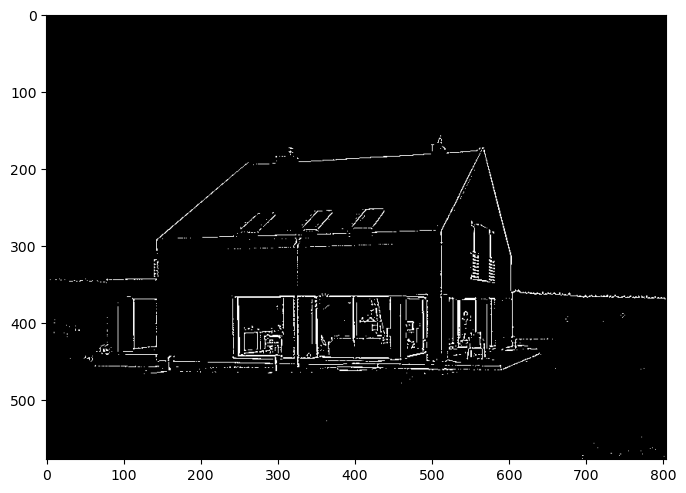

In [15]:
threshold_value = 20
ret, thresh = cv2.threshold(laplacian_edge, threshold_value, 255,cv2.THRESH_BINARY )

print('ret', ret)
show_img_plt(thresh)

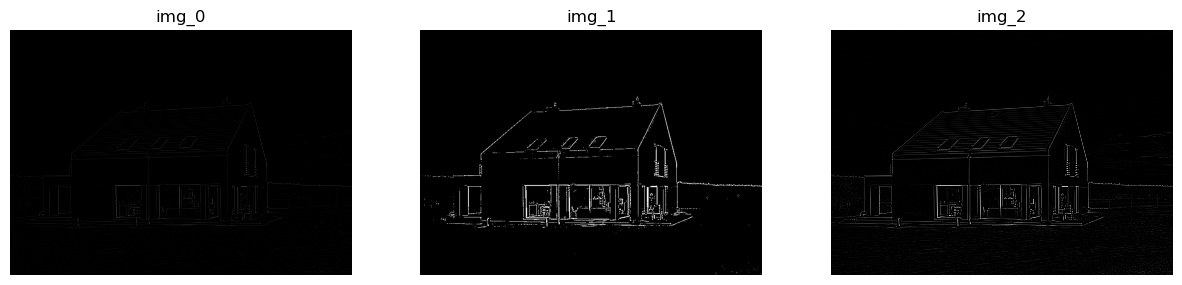

In [16]:
show_mult_img_plt(1, 3, (laplacian_edge, thresh, laplacian))

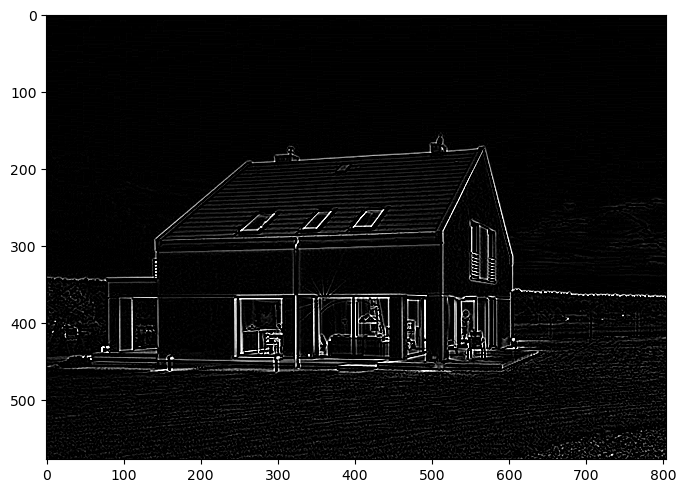

In [17]:
laplacian_kernel_5 =np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, +16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]], dtype= np.float32)
laplacian_edge_5 = cv2.filter2D(img_gaussian_blur, -1, laplacian_kernel_5)
show_img_plt(laplacian_edge_5)

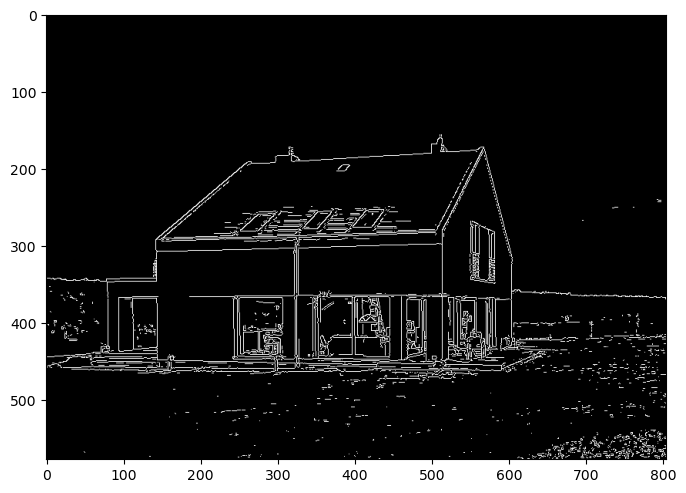

In [26]:
#canny edge detector
image = cv2.imread('img/0_home.jpg', cv2.IMREAD_GRAYSCALE)
canny = cv2.Canny(image, 100, 120)
show_img_plt(canny)

In [ ]:
show_mult_img_plt(1, 3, (laplacian, sobel_xy, canny))